In [54]:
import numpy as np
import seaborn as sns #визуализация
import matplotlib.pyplot as plt
import pandas as pd # основная работа с df

In [55]:
ttt = pd.read_csv("/content/drive/MyDrive/test data.csv", sep=',', encoding='windows-1251')
all = [i.split(',') for i in ttt.Week]
for j in range(ttt.shape[0]):
  for i in range(ttt.shape[1]):
    ttt.iloc[j,i] = all[j][i] 
ttt

,Week,Date,Event_Count,FederalDistrict_Name,Event_Name
0,18,2018-05-01 00:00:00,117,Central,"""Регистрация пользователя"""
1,18,2018-05-01 00:00:00,1,Far Eastern,"""Регистрация пользователя"""
2,18,2018-05-01 00:00:00,10,North Caucasian,"""Регистрация пользователя"""
3,18,2018-05-01 00:00:00,20,Northwestern,"""Регистрация пользователя"""
4,18,2018-05-01 00:00:00,5,Siberian,"""Регистрация пользователя"""
...,...,...,...,...,...
658,23,2018-06-07 00:00:00,149,Siberian,"""Активация кода"""
659,23,2018-06-07 00:00:00,170,Southern,"""Активация кода"""
660,23,2018-06-07 00:00:00,14,Undefined,"""Активация кода"""
661,23,2018-06-07 00:00:00,138,Ural,"""Активация кода"""


In [56]:
ttt.Event_Count	= ttt.Event_Count.map(int)
ttt.Week	= ttt.Week.map(int)

## Как выглядит региональная структура дистрибуции продукта?

In [57]:
print("Федеральные округа, где проходит акция")
ttt.FederalDistrict_Name.unique()

Федеральные округа, где проходит акция


array(['Central', 'Far Eastern', 'North Caucasian', 'Northwestern',
       'Siberian', 'Southern', 'Undefined', 'Ural', 'Volga'], dtype=object)

In [58]:
terr = pd.DataFrame(ttt.groupby(ttt.FederalDistrict_Name).Event_Count.sum()).T
terr

FederalDistrict_Name,Central,Far Eastern,North Caucasian,Northwestern,Siberian,Southern,Undefined,Ural,Volga
Event_Count,31071,163,1720,10545,5292,7971,1210,8213,19908


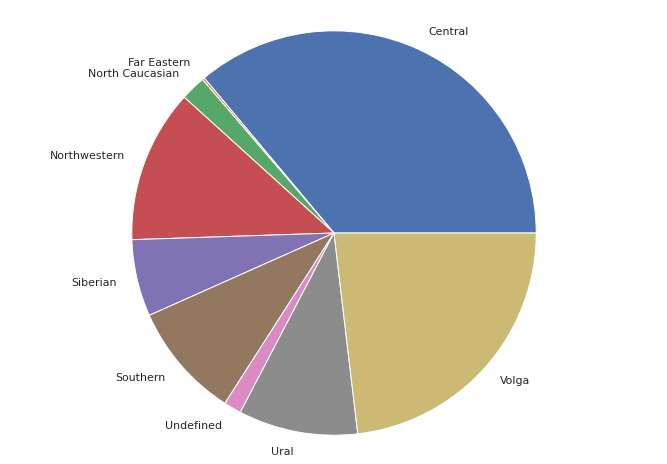

In [59]:
fig1, ax1 = plt.subplots()
ax1.pie(terr.iloc[0,:], labels=terr.columns)
ax1.axis('equal')  
plt.show()

*Круговая диаграмма общего кол-ва промо-акций в регионах.*


*Можно сделать вывод, что производству выгодно находиться в Центральном или Приволжском федеральном округе*

## График роста количества промо-акций

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


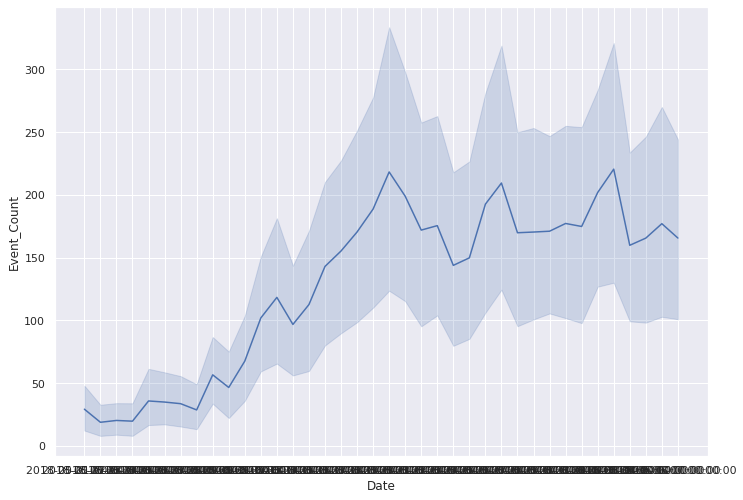

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(ttt.Date, ttt.Event_Count)

In [61]:
# Date.unique(), ttt.groupby(ttt.Date).Event_Count.min())
# sns.lineplot(ttt.Date.unique(), ttt.groupby(ttt.Date).Event_Count.sum())
# sns.lineplot(ttt.Date.unique(), ttt.groupby(ttt.Date).Event_Count.mean())

In [86]:
r = ttt.groupby(ttt.Date).Event_Count.mean()
r.sort_values(ascending = False).head(3)

Date
2018-06-03 00:00:00    220.444444
2018-05-20 00:00:00    218.222222
2018-05-27 00:00:00    209.388889
Name: Event_Count, dtype: float64

 Даты максимумов среднего кол-ва промо-акций = 3 июня 2018 года, 20 и 27 мая 2018 года
 
 **Эти дни были воскресениями**

In [87]:
#sns.lineplot(ttt.Date.unique(), ttt[ttt.FederalDistrict_Name == 'Central'].groupby(ttt.Date).FederalDistrict_Name.count())
# ttt[ttt.Date < '2018-05-05 00:00:00'].FederalDistrict_Name.hist()

In [88]:
# ttt[ttt.Date > '2018-05-30 00:00:00'].FederalDistrict_Name.hist()
# Far Eastern изначально мало, растет к концу, в конце все дистрикты равны

In [93]:
 ttt.groupby(ttt.Date).agg({'Event_Count': 'sum'}).sort_values(by = 'Event_Count', ascending = True).head(5)

,Event_Count
Date,
2018-05-02 00:00:00,319
2018-05-04 00:00:00,334
2018-05-03 00:00:00,364
2018-05-01 00:00:00,438
2018-05-08 00:00:00,515


In [94]:
 ttt.groupby(ttt.Date).agg({'Event_Count': 'sum'}).sort_values(by = 'Event_Count', ascending = True).tail()

,Event_Count
Date,
2018-05-26 00:00:00,3466
2018-06-02 00:00:00,3633
2018-05-27 00:00:00,3769
2018-05-20 00:00:00,3928
2018-06-03 00:00:00,3968


In [89]:
ttt.groupby(ttt.FederalDistrict_Name).count().Date

FederalDistrict_Name
Central            76
Far Eastern        57
North Caucasian    76
Northwestern       76
Siberian           76
Southern           76
Undefined          75
Ural               75
Volga              76
Name: Date, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


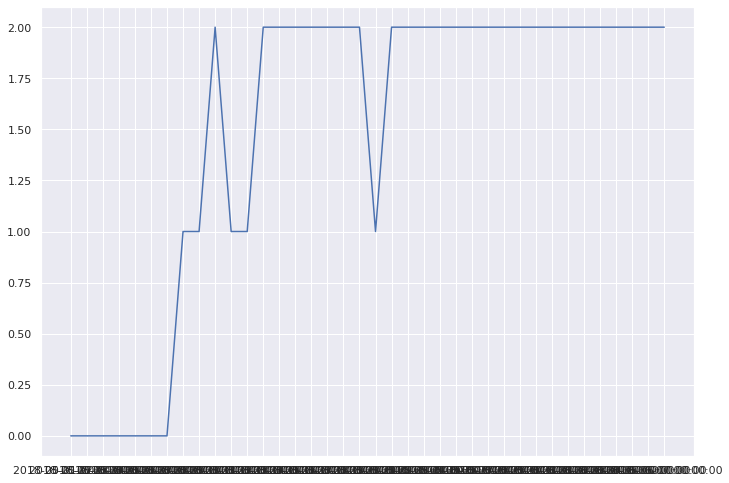

In [95]:
pd.concat([pd.Series([0]*7),ttt[ttt.FederalDistrict_Name == 'Far Eastern'].groupby(ttt.Date).FederalDistrict_Name.count()])
sns.lineplot(ttt.Date.unique(), pd.concat([pd.Series([0]*7),ttt[ttt.FederalDistrict_Name == 'Far Eastern']
                                           .groupby(ttt.Date).FederalDistrict_Name.count()]))

В Дальневосточном федеральном округе компания началась позже, чем в остальных